## Relative Improvement

/tmp/ipykernel_705329/771667969.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(labels)
/tmp/ipykernel_705329/771667969.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels(labels)


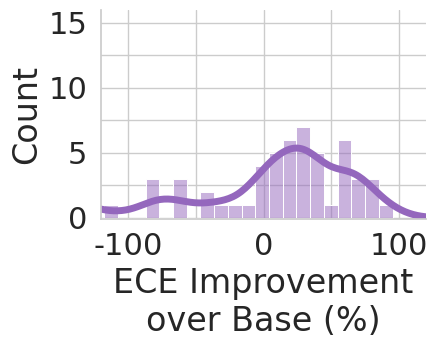

In [12]:
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

sns.set_theme(font_scale=2., style="whitegrid")

ref = plt_results[plt_results.train_mode == "$\mathrm{IT}$"]["qa_unc_ece_100"].values
new = plt_results[plt_results.train_mode == "$\mathrm{UT}$"]["qa_unc_ece_100"].values



g = sns.displot(
    pd.DataFrame({ "rel_imp": -((new - ref) / ref) * 100. }),
    # kind="kde", fill=True, bw_adjust=.5,
    kde=True, stat="count", kde_kws={"bw_adjust": .5, "cut": 2}, binwidth=10,
    height=4, aspect=11/9, 
    legend=False,
    palette=sns.color_palette("tab20")[8:9]
)

g.ax.get_lines()[0].set(linewidth=5)

import matplotlib.ticker as ticker
g.ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
g.ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))

g.ax.set_ylim(-0.1, 16)
g.ax.set_xlim(-120, 120)

labels= [f"{int(x)}" for x in g.ax.get_xticks()]
labels[0] = ""
labels[2] = ""
labels[4] = ""
g.ax.set_xticklabels(labels)

labels= [f"{int(x)}" for x in g.ax.get_yticks()]
labels[0] = ""
labels[2] = ""
labels[4] = ""
labels[6] = ""
g.ax.set_yticklabels(labels)

g.set(xlabel="ECE Improvement\nover Base (%)")

g.fig.tight_layout()
g.fig.show()
g.fig.savefig("mmlu_rel_imp_mcqa.pdf", bbox_inches="tight")

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# sns.set(font_scale=2., style='whitegrid')

# metric = "qa_unc_ece_100"
# flip = -1 if metric in ["ece", "qa_unc_ece", "qa_unc_ece_100"] else 1

# ut_metric = plt_results[plt_results.train_mode == "$\mathrm{UT}$"][[metric]].values.flatten()
# it_metric = plt_results[plt_results.train_mode == "$\mathrm{IT}$"][[metric]].values.flatten()

# print(sum(flip * ut_metric <= flip * it_metric))

# fig, ax = plt.subplots(figsize=(5,5))

# ax.set_yticks(np.arange(0, 15, 5))

# ax.hist((((ut_metric - it_metric) * flip / it_metric)) * 100.)

# fig.show()

## Task Breakdown

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(font_scale=6., style='whitegrid')

fig, ax = plt.subplots(figsize=(200, 40))

sns.barplot(ax=ax, data=plt_results,
            x="task_idx", y="unc_acc_100", hue="train_mode",
            width=0.68,
            palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel('Query Acc. (%)', fontsize=250, labelpad=100)
ax.set_ylim(30, 80)
ax.set_yticks(np.arange(0, 100 + 1e-3, 20))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180), bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_correctness_comparison.pdf", bbox_inches="tight")

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(font_scale=6., style='whitegrid')

fig, ax = plt.subplots(figsize=(200, 40))

sns.barplot(ax=ax, data=plt_results,
            x="task_idx", y="qa_unc_ece_100", hue="train_mode",
            width=0.68,
            palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel(r'$\mathrm{ECE} (\%)$', fontsize=250, labelpad=100)
ax.set_yticks(np.arange(0, 30 + 1e-3, 10))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left',
          title='', title_fontsize=200,
          prop=dict(size=180))

fig.tight_layout()
fig.show()
fig.savefig("mmlu_ece_comparison.pdf", bbox_inches="tight")

NameError: name 'plt_results' is not defined

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-base-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

ct_df = pd.concat(all_dfs)

df = pd.read_csv("../classifier_results.csv")
df["model_name"] = df["model_name"].apply(lambda x: "Probe_" + x)
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]

ts_df = pd.read_csv("../classifier_ts_results.csv")
ts_df["model_name"] = ts_df["model_name"].apply(lambda x: "Probe-TS_" + x)
ts_df["mode_tag"] = ts_df["train_mode"] + " -> " + ts_df["eval_mode"]

# df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
# df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

df = pd.concat([df, ts_df, base_df, ct_df])
df = df[df["mode_tag"] == "oe -> oe"]

df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

ve_df = pd.read_csv("../ve_results.csv")
ve_df = ve_df[ve_df["eval_mode"] == "oe"]
ve_df["model"] = ve_df["model_name"]
ve_df["style"] = ve_df["eval_method"].apply(lambda x: "VE " + x[2:].upper())

samp_df = pd.read_csv("../sampling_results.csv")

samp_count_df = samp_df[[
    'dataset', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting',
    'split',
    'model'
]]
samp_count_df['style'] = "Counting"
samp_count_df['unc_auroc'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting']
samp_count_df['unc_ece'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting']

samp_likeli_df = samp_df[[
    'dataset', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_likelihood',
    'split',
    'model'
]]
samp_likeli_df['style'] = "Likelihood"
samp_likeli_df['unc_auroc'] = samp_likeli_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_likelihood']
samp_likeli_df['unc_ece'] = samp_likeli_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood']

df = pd.concat([df, ve_df, samp_count_df, samp_likeli_df])
df = df[df["split"] == "test"]

model_name_map = {
    "llama2_7b": "LLaMA-2\n7B",
    "llama2_7b_chat": "LLaMA-2\n7B Chat",
    "llama2_13b": "LLaMA-2\n13B",
    "llama2_13b_chat": "LLaMA-2\n13B Chat",
    "mistral_7b": "Mistral\n7B",
    "mistral_7b_instruct": "Mistral\n7B Instruct",
}

df["model"] = df["model"].apply(lambda x: model_name_map[x])

#aggregate by model name
_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()


/tmp/ipykernel_352060/1216267637.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['style'] = "Counting"
/tmp/ipykernel_352060/1216267637.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['unc_auroc'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting']
/tmp/ipykernel_352060/1216267637.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

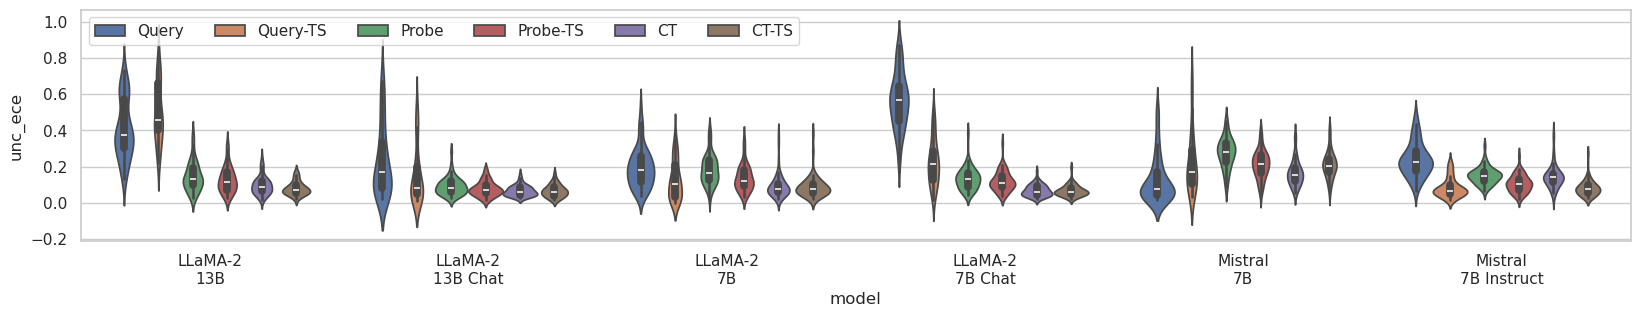

In [102]:
fig, ax = plt.subplots(figsize=(20, 3))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    hue_order=["Query", "Query-TS", "Probe","Probe-TS", "CT", "CT-TS"],
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    hue_order=["Query", "Query-TS", "Probe","Probe-TS", "CT", "CT-TS"],
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

Text(0.5, 0, '')

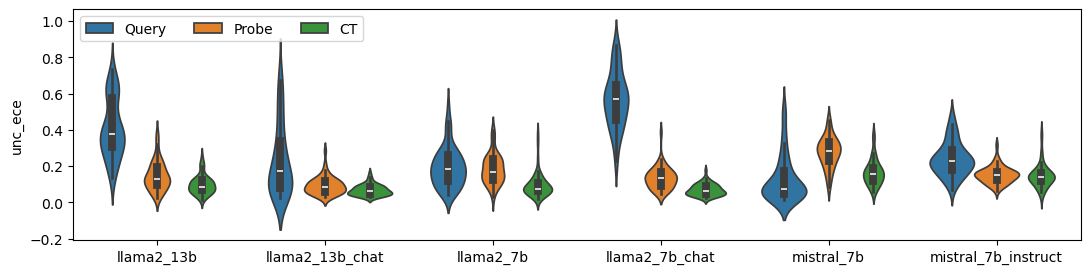

In [4]:
fig, ax = plt.subplots(figsize=(13, 3))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    hue_order=["Query", "Probe", "CT"],
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    hue_order=["Query", "Probe", "CT"],
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.xlabel("")

Text(0.5, 0, '')

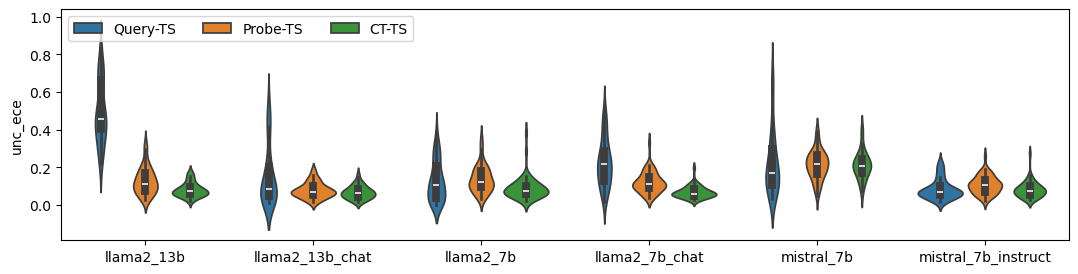

In [5]:
fig, ax = plt.subplots(figsize=(13, 3))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    hue_order=["Query-TS", "Probe-TS", "CT-TS"],
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    hue_order=["Query-TS", "Probe-TS", "CT-TS"],
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.xlabel("")

Text(0.5, 0, '')

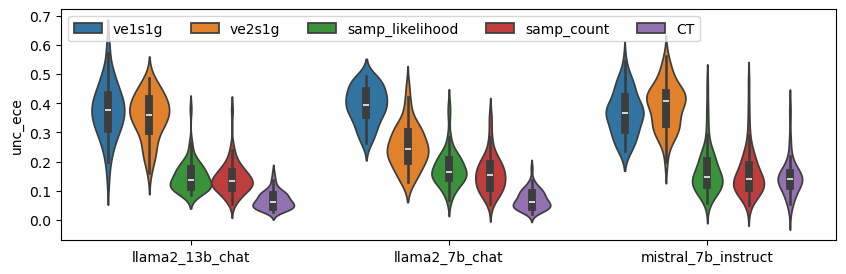

In [4]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.violinplot(
    ax=ax,
    data=_df[_df['model'].str.contains("chat") | _df['model'].str.contains("instruct")],
    hue="style",
    hue_order=["ve1s1g", "ve2s1g", "samp_likelihood", "samp_count", "CT"],
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df[_df['model'].str.contains("chat") | _df['model'].str.contains("instruct")],
    hue="style",
    hue_order=["ve1s1g", "ve2s1g", "samp_likelihood", "samp_count", "CT"],
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.xlabel("")

Text(0.5, 0, '')

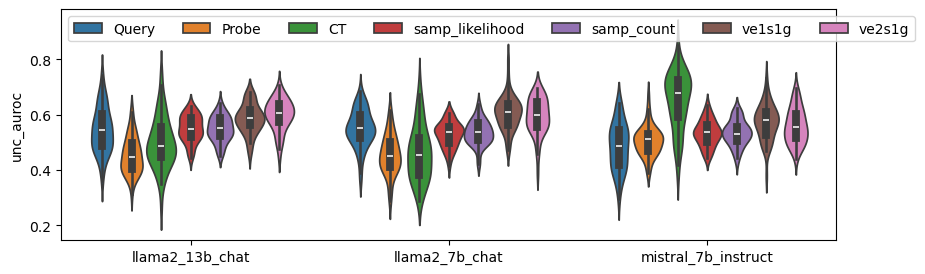

In [8]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.violinplot(
    ax=ax,
    data=_df[_df['model'].str.contains("chat") | _df['model'].str.contains("instruct")],
    hue="style",
    x="model",
    y="unc_auroc",
    hue_order=["Query", "Probe", "CT", "samp_likelihood", "samp_count", "ve1s1g", "ve2s1g"],
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df[_df['model'].str.contains("chat") | _df['model'].str.contains("instruct")],
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_auroc",
    hue_order=["Query", "Probe", "CT", "samp_likelihood", "samp_count", "ve1s1g", "ve2s1g"],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=8)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

Text(0.5, 0, '')

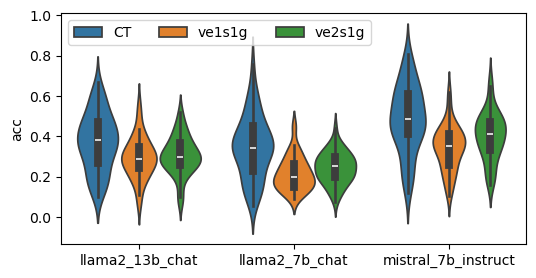

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.violinplot(
    ax=ax,
    data=_df[_df['model'].str.contains("chat") | _df['model'].str.contains("instruct")],
    hue="style",
    hue_order=["CT", "ve1s1g", "ve2s1g"],
    x="model",
    y="acc",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df[_df['model'].str.contains("chat") | _df['model'].str.contains("instruct")],
    hue="style",
    hue_order=["CT", "ve1s1g", "ve2s1g"],
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_acc",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=6)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

/tmp/ipykernel_352060/329448954.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_352060/329448954.py:127: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_352060/329448954.py:194: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


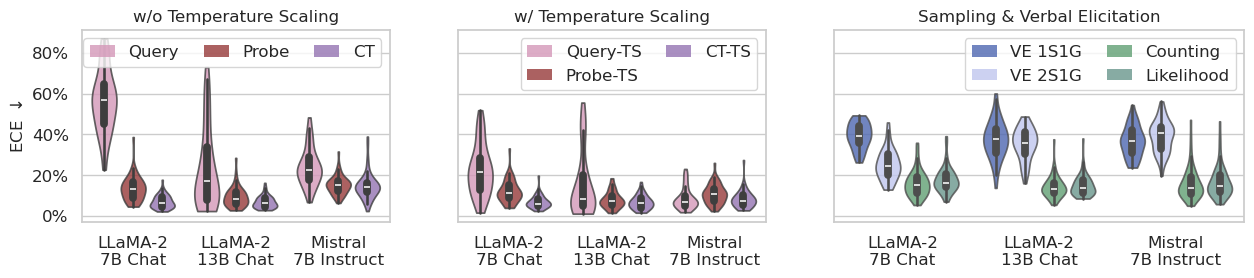

In [116]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 2.5), sharey=True, gridspec_kw={'width_ratios': [3, 3, 4]})

hue_order = ["Query", "Probe", "CT"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[0],
)

handles, labels = axs[0].get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[0],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

# from matplotlib.collections import PolyCollection
# violins = [art for art in axs[0].get_children() if isinstance(art, PolyCollection)]
# for i, violin in enumerate(violins):
#     violin.set_edgecolor(palette[i % len(palette)])


axs[0].legend(
    handles=handles, labels=labels, ncol=7, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[0].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[0].get_yticks()
axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[0].tick_params(axis='y', labelsize=12)
axs[0].tick_params(axis='x', labelsize=12)

axs[0].set_xlabel("")
axs[0].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[0].set_title("w/o Temperature Scaling")




hue_order = ["Query-TS", "Probe-TS", "CT-TS"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[1],
)

handles, labels = axs[1].get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[1],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

# from matplotlib.collections import PolyCollection
# violins = [art for art in axs[1].get_children() if isinstance(art, PolyCollection)]
# for i, violin in enumerate(violins):
#     violin.set_edgecolor(palette[i % len(palette)])


axs[1].legend(
    handles=handles, labels=labels, ncol=2, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[1].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[1].get_yticks()
axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[1].tick_params(axis='y', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)

axs[1].set_xlabel("")
axs[1].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[1].set_title("w/ Temperature Scaling")



hue_order = ["VE 1S1G", "VE 2S1G", "Counting", "Likelihood",]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=_df[_df['model'].str.contains("Chat") | _df['model'].str.contains("Instruct")],
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[2],
)

handles, labels = axs[2].get_legend_handles_labels()

sns.violinplot(
    data=_df[_df['model'].str.contains("Chat") | _df['model'].str.contains("Instruct")],
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[2],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

# from matplotlib.collections import PolyCollection
# violins = [art for art in axs[2].get_children() if isinstance(art, PolyCollection)]
# for i, violin in enumerate(violins):
#     violin.set_edgecolor(palette[i % len(palette)])


axs[2].legend(
    handles=handles, labels=labels, ncol=2, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[2].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[2].get_yticks()
axs[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[2].tick_params(axis='y', labelsize=12)
axs[2].tick_params(axis='x', labelsize=12)

axs[2].set_xlabel("")
axs[2].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[2].set_title("Sampling & Verbal Elicitation")

plt.savefig("oe_violin_plots.pdf", bbox_inches="tight")

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

all_dfs = []
for fn in glob.glob("results/eval-mmlu_choice-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-base-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []

for fn in glob.glob("results/eval-mmlu_choice-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)


ct_df = pd.concat(all_dfs)

df = pd.read_csv("../classifier_results.csv")
df["model_name"] = df["model_name"].apply(lambda x: "Probe_" + x)
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]

ts_df = pd.read_csv("../classifier_ts_results.csv")
ts_df["model_name"] = ts_df["model_name"].apply(lambda x: "Probe-TS_" + x)
ts_df["mode_tag"] = ts_df["train_mode"] + " -> " + ts_df["eval_mode"]

# df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
# df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

df = pd.concat([df, ts_df, base_df, ct_df])
df = df[df["mode_tag"] == "choice -> choice"]

df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

ve_df = pd.read_csv("../ve_results.csv")
ve_df = ve_df[ve_df["eval_mode"] == "choice"]
ve_df["model"] = ve_df["model_name"]
ve_df["style"] = ve_df["eval_method"].apply(lambda x: "VE " + x[2:].upper())

#copy base df
logits_df = base_df.copy()
logits_df = logits_df[logits_df["mode_tag"] == "choice -> choice"]
logits_df["model"] = logits_df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
logits_df["style"] = "Logits"
logits_df["unc_ece"] = logits_df["logits_ece"]

df = pd.concat([df, ve_df, logits_df])
df = df[df['split'] == 'test']

model_name_map = {
    "llama2_7b": "LLaMA-2\n7B",
    "llama2_7b_chat": "LLaMA-2\n7B Chat",
    "llama2_13b": "LLaMA-2\n13B",
    "llama2_13b_chat": "LLaMA-2\n13B Chat",
    "mistral_7b": "Mistral\n7B",
    "mistral_7b_instruct": "Mistral\n7B Instruct",
}

df["model"] = df["model"].apply(lambda x: model_name_map[x])

#aggregate by model name
_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()

/tmp/ipykernel_352060/2764684972.py:85: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _df = df.groupby(["dataset", "model", "style"]).mean().reset_index()


In [118]:
import palettable

mendl = palettable.wesanderson.Mendl_4.hex_colors
moonrise45 = palettable.wesanderson.Moonrise4_5.hex_colors

color_map = {
    "CT": "#9468bd",
    "CT-TS": "#9468bd",

    "Query": mendl[0],
    "Query-TS": mendl[0],

    "Logits": "#55aa6f",
    "Logits-TS": "#55aa6f",

    "Counting": "#55aa6f",
    "Likelihood": "#629d90",

    "Probe": "brown",
    "Probe-TS": "brown",

    "VE 1S1G": "#3d5fc2",
    "VE 1S2G": mendl[3],
    "VE 2S1G": mendl[1],
    "VE 2S2G": "#9ca7f2",
    "VE 2S1CoT": "#5da2da",
}


/tmp/ipykernel_352060/814647075.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_352060/814647075.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


/tmp/ipykernel_352060/814647075.py:197: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


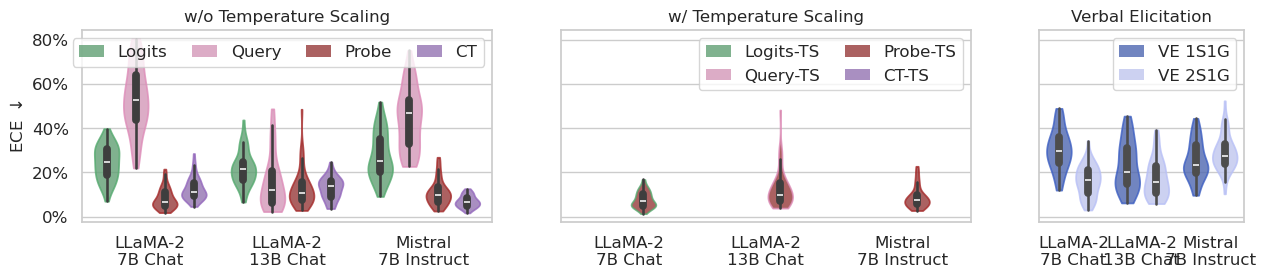

In [121]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 2.5), sharey=True, gridspec_kw={'width_ratios': [4, 4, 2]})

hue_order = ["Logits", "Query", "Probe", "CT"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[0],
)

handles, labels = axs[0].get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[0],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[0].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    print(violin)
    violin.set_edgecolor(palette[i % len(palette)])


axs[0].legend(
    handles=handles, labels=labels, ncol=7, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[0].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[0].get_yticks()
axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[0].tick_params(axis='y', labelsize=12)
axs[0].tick_params(axis='x', labelsize=12)

axs[0].set_xlabel("")
axs[0].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[0].set_title("w/o Temperature Scaling")




hue_order = ["Logits-TS", "Query-TS", "Probe-TS", "CT-TS"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[1],
)

handles, labels = axs[1].get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[1],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[1].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    print(violin)
    violin.set_edgecolor(palette[i % len(palette)])


axs[1].legend(
    handles=handles, labels=labels, ncol=2, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[1].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[1].get_yticks()
axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[1].tick_params(axis='y', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)

axs[1].set_xlabel("")
axs[1].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[1].set_title("w/ Temperature Scaling")



hue_order = ["VE 1S1G", "VE 2S1G"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=_df[_df['model'].str.contains("Chat") | _df['model'].str.contains("Instruct")],
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[2],
)

handles, labels = axs[2].get_legend_handles_labels()

sns.violinplot(
    data=_df[_df['model'].str.contains("Chat") | _df['model'].str.contains("Instruct")],
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[2],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[2].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    print(violin)
    violin.set_edgecolor(palette[i % len(palette)])


axs[2].legend(
    handles=handles, labels=labels, ncol=1, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[2].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[2].get_yticks()
axs[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[2].tick_params(axis='y', labelsize=12)
axs[2].tick_params(axis='x', labelsize=12)

axs[2].set_xlabel("")
axs[2].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[2].set_title("Verbal Elicitation")

plt.savefig("mcqa_violin_plots.pdf", bbox_inches="tight")

In [78]:
_df

,dataset,model,style,N,logits_ece,acc,unc_acc,unc_auroc,unc_ece,ts,fuzzy_gpt-3.5-turbo-1106_acc,fuzzy_gpt-3.5-turbo-1106_unc_acc,fuzzy_gpt-3.5-turbo-1106_unc_auroc,fuzzy_gpt-3.5-turbo-1106_unc_ece,seed,model_dir,peft_dir,query_peft_dir,eval_kshot
0,mmlu:abstract_algebra,LLaMA-2\n13B,Logits,100.0,0.060608,0.330000,0.330000,0.386929,0.060608,21.184402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mmlu:abstract_algebra,LLaMA-2\n13B,Probe,100.0,0.042223,0.310000,0.710000,0.364189,0.042607,19.084298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mmlu:abstract_algebra,LLaMA-2\n13B,Query,100.0,0.060608,0.330000,0.330000,0.386929,0.507582,21.184402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mmlu:abstract_algebra,LLaMA-2\n13B Chat,Logits,100.0,0.163091,0.290000,0.300000,0.571151,0.163091,21.475197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mmlu:abstract_algebra,LLaMA-2\n13B Chat,Probe,100.0,0.162005,0.290000,0.460000,0.413307,0.187158,19.291867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,mmlu:world_religions,Mistral\n7B Instruct,Probe,171.0,0.134760,0.824561,0.789474,0.656619,0.033683,14.299879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1508,mmlu:world_religions,Mistral\n7B Instruct,Probe-TS,171.0,0.134434,0.824561,0.795322,0.655556,0.043176,14.806296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1509,mmlu:world_religions,Mistral\n7B Instruct,Query,171.0,0.136430,0.830409,0.315789,0.393638,0.589608,13.776386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1510,mmlu:world_religions,Mistral\n7B Instruct,ve1s1g,171.0,NaN,NaN,NaN,NaN,NaN,45.698444,0.789474,0.795322,0.671502,0.212810,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, '')

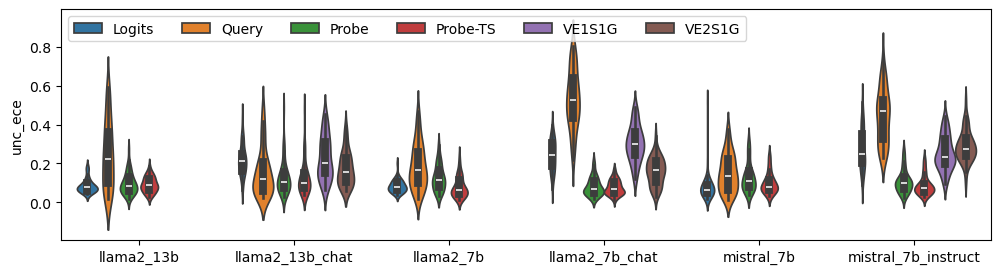

In [12]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    x="model",
    y="unc_ece",
    hue_order=["Logits", "Query", "Probe", "Probe-TS", "VE 1S1G", "VE 2S1G"],
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    hue_order=["Logits", "Query", "Probe", "Probe-TS", "VE 1S1G", "VE 2S1G"],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=7)

plt.xlabel("")

Text(0.5, 0, '')

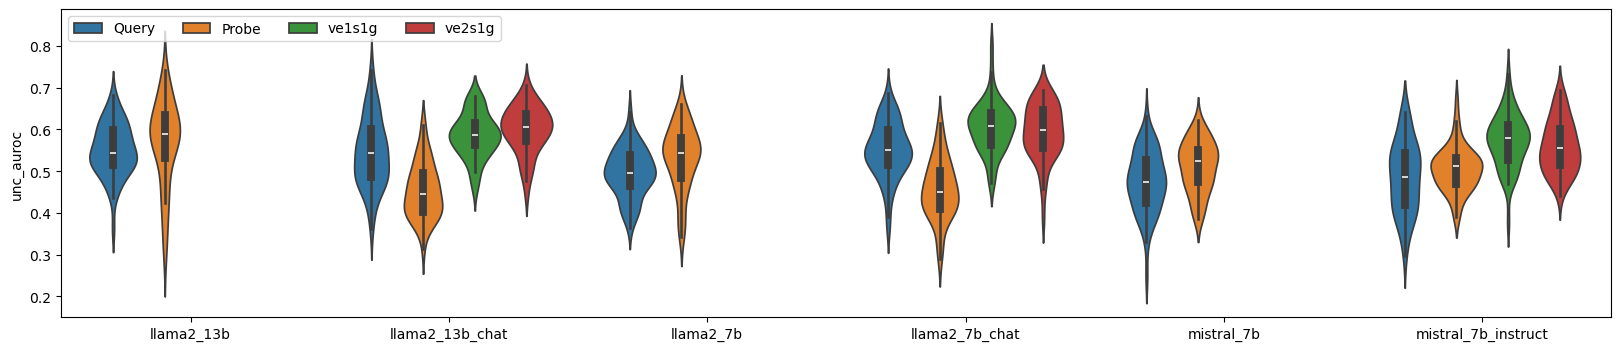

In [12]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    x="model",
    y="unc_auroc",
    hue_order=["Query", "Probe", "ve1s1g", "ve2s1g"],
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_unc_auroc",
    hue_order=["Query", "Probe", "ve1s1g", "ve2s1g"],
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=7)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

Text(0.5, 0, '')

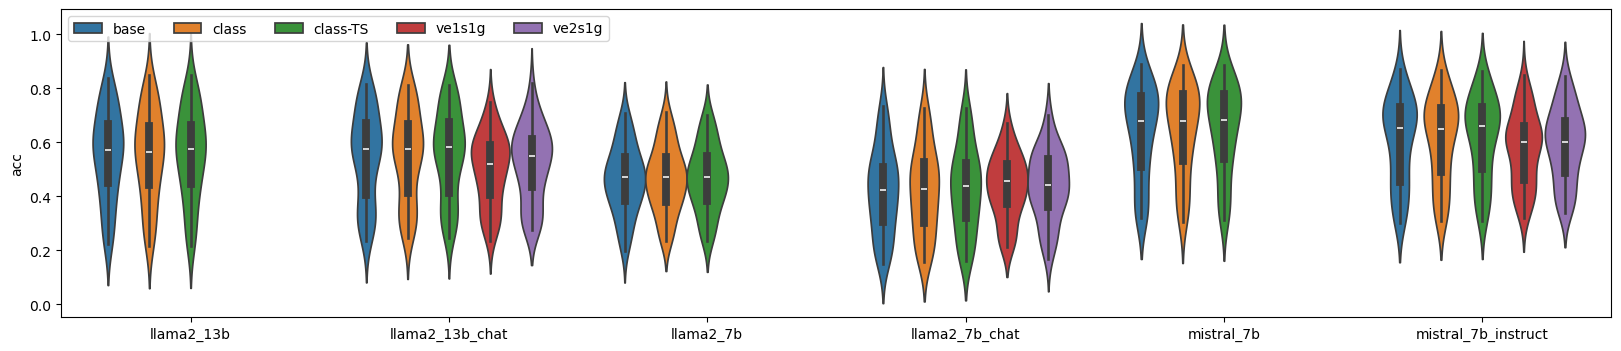

In [4]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.violinplot(
    ax=ax,
    data=_df,
    hue="style",
    x="model",
    y="acc",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    hue="style",
    x="model",
    y="fuzzy_gpt-3.5-turbo-1106_acc",
    # hue_order=order,
    # df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left', ncol=6)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

/tmp/ipykernel_352060/1751110587.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _df = df.groupby(["model_name", "dataset", "mode_tag"]).mean().reset_index()


Text(0.5, 0, '')

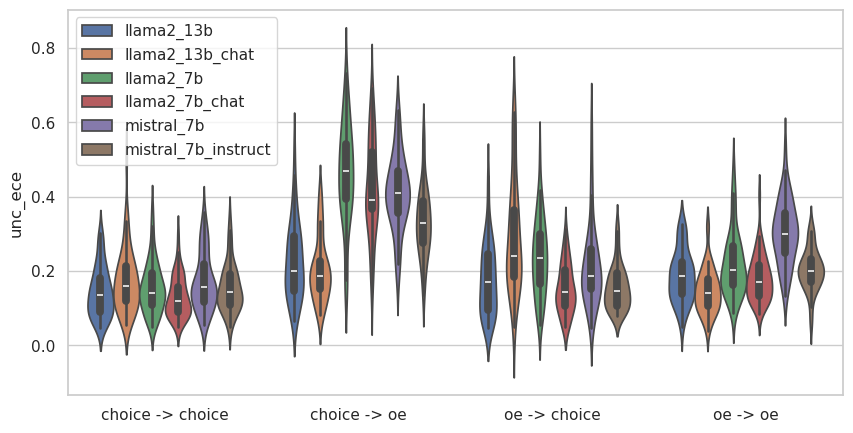

In [122]:
df = pd.read_csv("../classifier_results.csv")
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]
# df = df[(df["eval_mode"] == "choice") & (df["train_mode"] == "choice")]

#aggregate by model name
_df = df.groupby(["model_name", "dataset", "mode_tag"]).mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(
    ax=ax,
    data=_df,
    x="mode_tag",
    hue="model_name",
    y="unc_ece",
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
)

handles, labels = ax.get_legend_handles_labels()

sns.violinplot(
    data=_df,
    x="mode_tag",
    hue="model_name",
    y="fuzzy_gpt-3.5-turbo-1106_unc_ece",
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("fuzzy_gpt-3.5-turbo-1106_unc_ece")["model_name"],
)

ax.legend(handles=handles, labels=labels, loc='upper left')

plt.xlabel("")


In [3]:
df

,N,logits_ece,acc,unc_acc,unc_auroc,unc_ece,dataset,split,ts,model_name,train_mode,eval_mode,fuzzy_gpt-3.5-turbo-1106_acc,fuzzy_gpt-3.5-turbo-1106_unc_acc,fuzzy_gpt-3.5-turbo-1106_unc_auroc,fuzzy_gpt-3.5-turbo-1106_unc_ece,mode_tag
0,11,0.124105,0.272727,0.727273,0.750000,0.273788,mmlu:abstract_algebra,validation,4.572419,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
1,100,0.079532,0.330000,0.660000,0.562641,0.087229,mmlu:abstract_algebra,test,10.942548,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
2,14,0.229091,0.642857,0.500000,0.266667,0.233030,mmlu:anatomy,validation,1.659051,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
3,135,0.071602,0.474074,0.592593,0.579555,0.123047,mmlu:anatomy,test,15.729031,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
4,16,0.193459,0.437500,0.625000,0.555556,0.074194,mmlu:astronomy,validation,2.990021,llama2_7b,choice,choice,NaN,NaN,NaN,NaN,choice -> choice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100,0.156133,0.700000,0.530000,0.483095,0.139453,mmlu:us_foreign_policy,test,13.116577,llama2_7b_chat,oe,choice,NaN,NaN,NaN,NaN,oe -> choice
1996,18,0.281525,0.444444,0.555556,0.412500,0.187469,mmlu:virology,validation,2.754456,llama2_7b_chat,oe,choice,NaN,NaN,NaN,NaN,oe -> choice
1997,166,0.316062,0.415663,0.506024,0.487151,0.135453,mmlu:virology,test,19.520353,llama2_7b_chat,oe,choice,NaN,NaN,NaN,NaN,oe -> choice
1998,19,0.083258,0.789474,0.473684,0.583333,0.231608,mmlu:world_religions,validation,1.793320,llama2_7b_chat,oe,choice,NaN,NaN,NaN,NaN,oe -> choice
